In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1

In [2]:
def uniform(a,b,N):
    deltax  =  (b -a)/N
    return deltax

In [3]:
a = -1
b = 1
N =100
x  =  np.linspace(a,b,N)

def f1(x):
    return (1 -  x)/np.sqrt(1 + x**2)

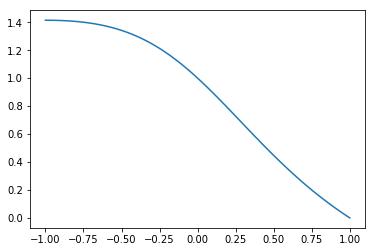

In [9]:
# plt.plot()
y  =  f1(x)
plt.plot(x,y)

In [34]:
def f2(x):
    return np.where( np.abs(x) <= 1, 1-x**2,0)

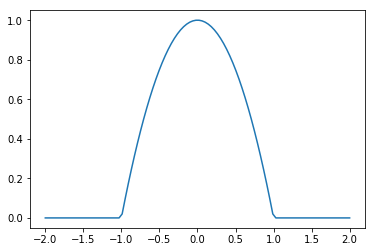

In [36]:
x  =  np.linspace(-2,2,N)

plt.plot(x,f2(x))

In [16]:
def f3(x):
    return 0

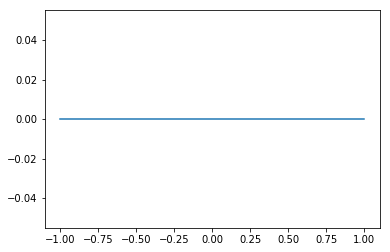

In [25]:
f3 =  np.vectorize(f3)
plt.plot(x,f3(x))

### Exercise 2

In [40]:
a,b = 0,500
T_0  =  300

deltat =  14
t  =  np.arange(a,b+1,deltat)

36

In [41]:
def model(t,T):
    C =  85
    alpha  =  0.3
    S_0 =  1367
    epsilon = 0.6
    delta =  5.67 * 10**-8
    dTdt =  ((1 -  alpha) * S_0 )/(4 * C)   -  (epsilon * delta * T**4)/C
    return dTdt

In [54]:
def Euler(t,deltat,T_0,model):
    T =  np.zeros(len(t))
    T[0]  =  T_0
    for n in range(len(T)-1):
        T[n+1]  =  T[n]   +  deltat * model(t[n],T[n])
    return T


def MidPointMethod(t,deltat,T_0,model):
    T =  np.zeros(len(t))
    T[0]  =  T_0
    for n in range(len(T)-1):
        t_half  =  t[n] + 0.5 * t[n]
        T_half  = T[n] + 0.5 * deltat * model(t_half, T[n])
        T[n+1]  =  T[n]   +  deltat * model(t_half,T_half)
    return T

def RK4(t,deltat,T_0,model):
    T =  np.zeros(len(t))
    T[0]  =  T_0
    for n in range(len(T)-1):
        k1  =  model(t[n],T[n])
        t_half  =  t[n] + 0.5 * t[n]
        k2  =  model(t_half, T[n] + (0.5 * deltat) * k1   )
        k3  =  model( t_half  ,   T[n] + (0.5 * deltat) * k2   )
        t[n+1] =  t[n]  + deltat
        k4  =  model(t[n+1],  T[n] + deltat * k3)
        T[n+1]  =  T[n]   +  (deltat/6) * ( k1 + 2*k2 + 2*k3 + k4)
    return T

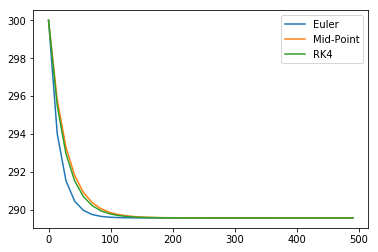

In [55]:
plt.plot(t,Euler(t,deltat,T_0,model),label="Euler")
plt.plot(t,MidPointMethod(t,deltat,T_0,model),label="Mid-Point")
plt.plot(t,RK4(t,deltat,T_0,model),label="RK4")
plt.legend()